In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic=sns.load_dataset('titanic')

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#features selection
X=[['pclass','sex','age','sibsp','parch']]
y = titanic['survived']

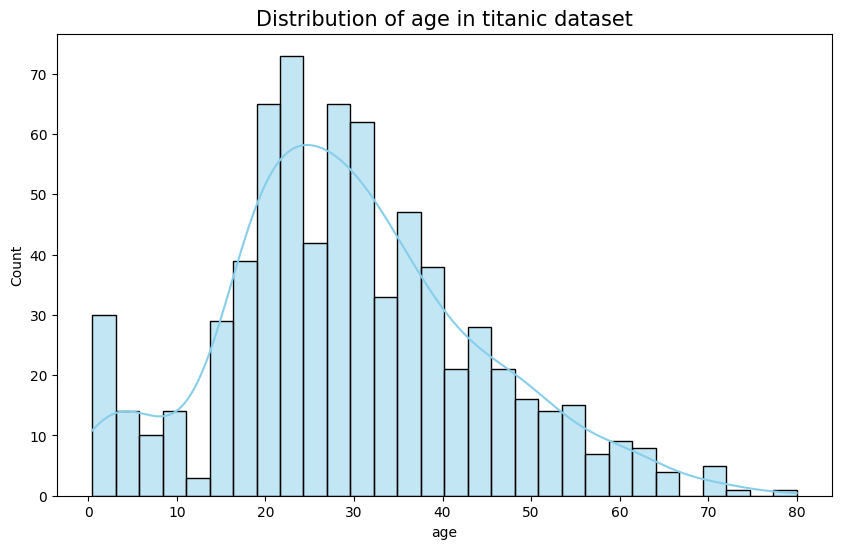

In [ ]:
# handling missing values
plt.figure(figsize=(10,6))
sns.histplot(titanic['age'],kde=True,bins=30,color='skyblue')
plt.title('Distribution of age in titanic dataset',fontsize=15)
plt.show()

In [ ]:
# almost uniformily distribute so use mean in filling
titanic['age']=titanic['age'].fillna(titanic['age'].mean)

<Axes: >

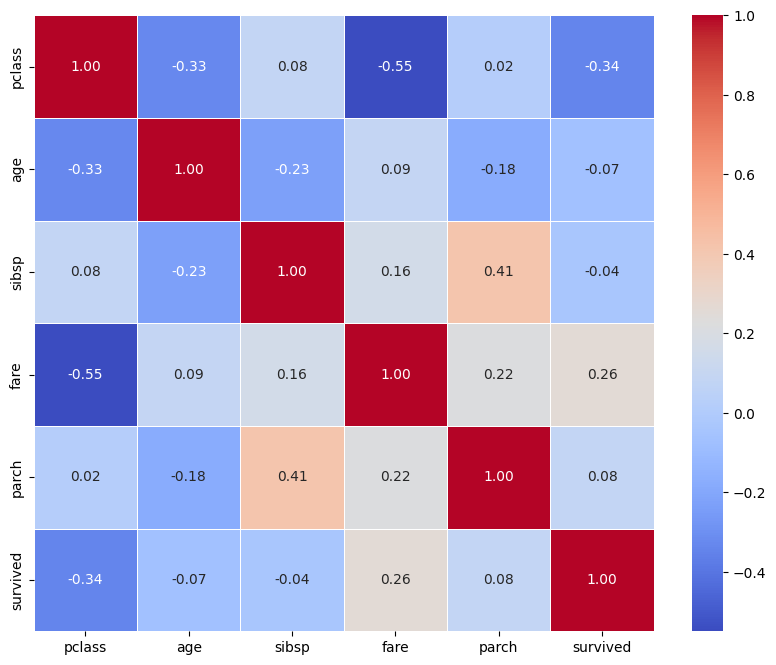

In [ ]:
# Correlation (Numerical Features)
numerical_features = ['pclass','age','sibsp','fare','parch']
correlation_matrix=titanic[numerical_features + ['survived']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

In [ ]:
#chi square text for (categorical features)
from scipy.stats import chi2_contingency

In [ ]:
contigency=pd.crosstab(titanic['sex'],titanic['survived'])

In [ ]:
#return chi2,p,dof and e value
chi2,p,dof,e=chi2_contingency(contigency)

In [ ]:
print('p-value',p)

p-value 1.1973570627755645e-58


In [ ]:
# p value less than 0.05 ---there is correlation between feature(sex is statistically significant and dependent on survival)

In [ ]:
# feature selection
X=titanic[['pclass','sex','age','sibsp','parch']]
y = titanic['survived']

<Axes: ylabel='age'>

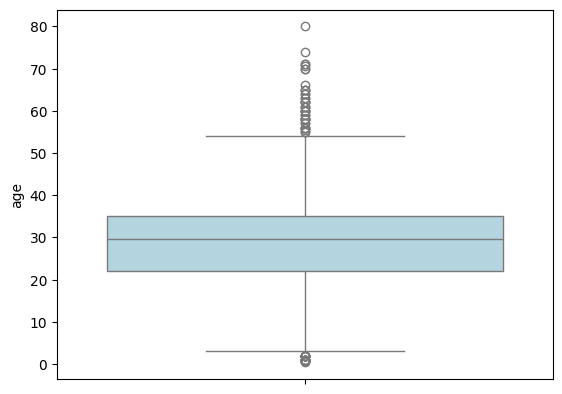

In [ ]:
# Find Outliers
sns.boxplot(titanic['age'],color='lightblue')

<Axes: ylabel='sibsp'>

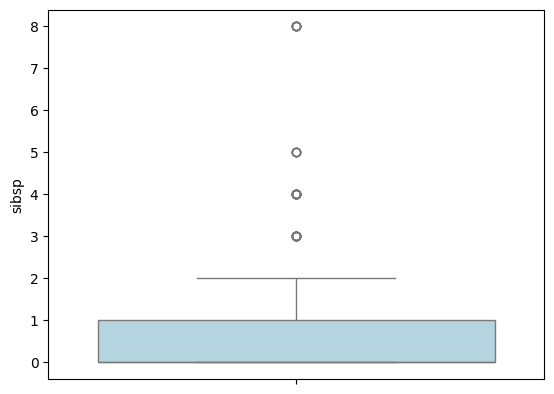

In [ ]:
sns.boxplot(titanic['sibsp'],color='lightblue')

<Axes: ylabel='parch'>

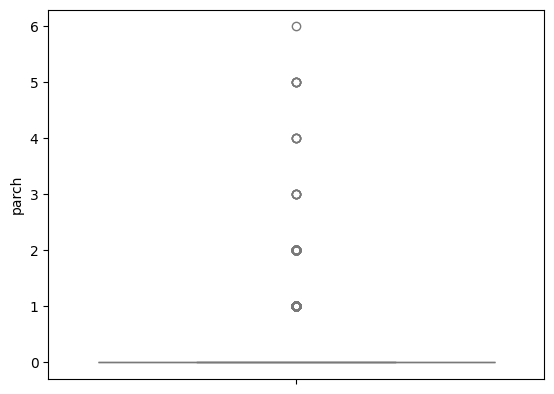

In [ ]:
sns.boxplot(titanic['parch'],color='lightblue')

In [ ]:
# Encoding ---non numerical featur
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
X['sex_encoded']=le.fit_transform(X['sex'])

<ipython-input-25-d12cc7848edc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex_encoded']=le.fit_transform(X['sex'])


In [ ]:
X

,pclass,sex,age,sibsp,parch,sex_encoded
0,3,male,22.000000,1,0,1
1,1,female,38.000000,1,0,0
2,3,female,26.000000,0,0,0
3,1,female,35.000000,1,0,0
4,3,male,35.000000,0,0,1
...,...,...,...,...,...,...
886,2,male,27.000000,0,0,1
887,1,female,19.000000,0,0,0
888,3,female,29.699118,1,2,0
889,1,male,26.000000,0,0,1


In [ ]:
# Remove sex column
X=X.drop('sex',axis=1)

In [ ]:
X.head()

,pclass,age,sibsp,parch,sex_encoded
0,3,22.0,1,0,1
1,1,38.0,1,0,0
2,3,26.0,0,0,0
3,1,35.0,1,0,0
4,3,35.0,0,0,1


In [ ]:
# scalinga  ---can be done as normalization
#min max scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=['pclass','age','sibsp','parch','sex'])

In [ ]:
X_scaled

,pclass,age,sibsp,parch,sex
0,1.0,0.271174,0.125,0.000000,1.0
1,0.0,0.472229,0.125,0.000000,0.0
2,1.0,0.321438,0.000,0.000000,0.0
3,0.0,0.434531,0.125,0.000000,0.0
4,1.0,0.434531,0.000,0.000000,1.0
...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,1.0
887,0.0,0.233476,0.000,0.000000,0.0
888,1.0,0.367921,0.125,0.333333,0.0
889,0.0,0.321438,0.000,0.000000,1.0
